In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

In [66]:
Parteien = np.array(['CDU','Die Grünen','SPD','FDP','Die Linke','Piratenpartei','REP','NPD','Die Partei','AFD'])
BT = np.array(['Die Grünen','SPD','CDU','FDP'])
Wichtig = np.array(['FDP','NPD','AFD','Die Linke'])

CDU = np.array([2,1,2,1,2,1,1,1,0,1,2,1,1,1,1,2,1,2,2,2,2,1,1,1,1,2,2,1,2,2,2,2,2,1,2,1,2,2])
GR = np.array([1,2,1,2,1,1,0,2,1,1,1,2,1,2,2,1,0,2,2,0,1,2,1,2,1,0,1,2,1,1,2,1,1,2,1,1,2,1])
SPD = np.array([1,2,1,2,0,1,1,2,1,1,1,2,1,1,2,2,2,2,2,1,1,0,1,2,1,0,1,2,1,1,2,2,1,1,1,1,2,1])
FDP = np.array([1,1,2,1,2,2,1,2,2,1,2,2,1,2,1,2,1,2,2,2,1,2,0,1,1,2,2,1,1,2,2,0,2,1,2,1,2,0])
LI = np.array([1,2,1,2,1,1,2,2,1,2,1,0,1,1,2,1,2,2,2,1,1,2,1,2,1,1,1,2,1,1,2,1,1,2,1,1,1,1])
PIR = np.array([1,2,1,2,1,2,2,2,1,0,1,1,1,0,2,1,0,2,0,0,1,2,1,2,1,1,1,0,2,0,2,1,1,2,1,1,1,1])
REP = np.array([0,1,2,1,2,2,1,1,1,1,2,1,2,1,1,1,1,0,2,2,2,1,2,1,2,1,2,1,2,2,0,2,2,1,2,2,2,2])
NPD = np.array([2,1,2,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,2,2,2,2,2,2,2,1,1,1,2,1,2,2,2,1,2,2,2,2])
DP = np.array([1,1,2,1,1,2,2,2,1,1,1,1,1,1,1,1,2,1,2,1,2,1,1,2,1,1,1,1,2,1,1,1,2,1,1,1,1,1])
AFD = np.array([0,1,2,1,1,2,1,1,1,1,0,2,1,1,1,1,1,1,2,2,2,1,2,1,2,1,2,1,2,2,2,0,2,1,2,1,2,2])

V = np.vstack([CDU,GR,SPD,FDP,LI,PIR,REP,NPD,DP,AFD])
V[V==2] = -1

N = len(CDU)
NP = len(Parteien)

norm = 1

font = {'fontname':'Century Gothic'}
Title1 = "Korrelation der Parteien in Baden-Württemberg\nnach Wahl-O-Mat (in %)"
Title2 = "Hauptkomponentenanalyse der Parteien\nin Baden-Württemberg nach Wahl-O-Mat"
cmap = 'coolwarm'
fontsize = 15

In [67]:
#compute distances
D = np.zeros((NP,NP))
for i in xrange(NP):
    for j in xrange(NP):
        D[i,j] = np.linalg.norm(V[i]-V[j],norm)
maxD = 2. * N**(1./norm)
S = (maxD - D)/maxD

In [68]:
#kill diagonal of S
for i in xrange(NP):
    for j in xrange(NP):      
        if j == i:
            S[i,j] = np.nan

In [69]:
def projectPrinc(vec,axis):
    return np.dot(vec,Evec[:,axis])

In [70]:
#principal components
m = np.mean(V,axis=0)
Vm = V - m
#covariance matrix
Cov = np.cov(np.transpose(V))
#eigenvalues, eigenvectors
Eval, Evec = np.linalg.eigh(Cov)
#sorting
idx1 = Eval.argsort()[::-1]   
Eval = Eval[idx1]
Evec = Evec[:,idx1]
d_princ0 = projectPrinc(Vm,0)
d_princ1 = projectPrinc(Vm,1)

In [72]:
def party2D():
    for i in xrange(NP):
        x,y = d_princ0[i],d_princ1[i]
        partei = Parteien[i]
        fweight, fsize = 'normal',fontsize-8
        marker, markersize = 'o', 0.5*fontsize
        if partei in BT:
            fweight, fsize = 'bold',fontsize
            marker, markersize = 's', 0.8*fontsize
        elif partei in Wichtig:
            fweight, fsize = 'bold',fontsize-4
            marker, markersize = 's', 0.5*fontsize
        ax.plot(x,y,marker=marker,markersize=markersize,color='orangered')
        ax.text(x,y-0.3, partei, ha='center', va='top', color='white',
                fontsize=fsize,fontweight=fweight,**font)

In [73]:
def wahlergebnis():
    label = 'Nach Wahlergebnis\ngewichtetes Mittel'
    x,y=projectPrinc(ergebnis_mittel,0),projectPrinc(ergebnis_mittel,1)
    ax.plot(x,y,marker='*',markersize=15,markeredgecolor='blue',color='blue')
    ax.text(x,y-0.2, label, ha='center', va='top', color='white',
                fontsize=fontsize-4,**font)

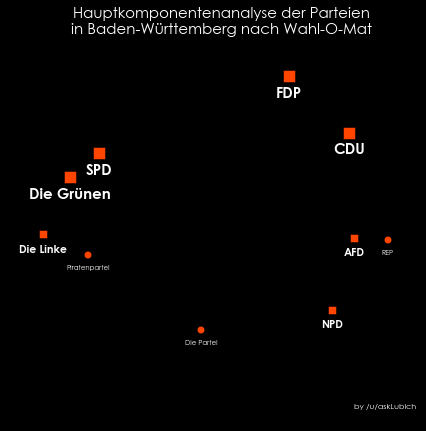

In [74]:
#2D plot
f, ax = plt.subplots(1, figsize=(7,7), dpi=500)
ax.axis('off')
f.patch.set_facecolor('black')
#ax.plot(d_princ0,d_princ1,'s',markersize=10,color='orangered')
party2D()
#wahlergebnis()
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
ax.text(6,-6, 'by /u/askLubich',color='white',ha='right', va='bottom',fontsize=8,**font)
ax.set_title(Title2,position=(0.5,.95),fontsize=fontsize,fontweight='normal',color='white',**font)
f.show()
f.savefig('2Dprinc.png',bbox_inches='tight', dpi=500,facecolor=f.get_facecolor(), edgecolor='none')

In [75]:
#sorting according to 1st principle axis
idx2 = d_princ0.argsort()
Parteien_sort = Parteien[idx2]
S_sort = S[idx2,:]
S_sort = S_sort[:,idx2]

In [76]:
def partylabel():
    for j in xrange(NP):
        partei = Parteien_sort[j]
        if partei in BT:
            fweight = 'bold'
        else:
            fweight = 'normal'
        #xlabels
        ax.text(j, -0.65, partei, ha='center', va='bottom', color='black',
                fontsize=fontsize,rotation=-90,fontweight=fweight,**font)
        ax.text(j, NP-0.35, partei, ha='center', va='top', color='black',
                fontsize=fontsize,rotation=90,fontweight=fweight,**font)
        #ylabels
        ax.text(-0.6, j, partei, ha='right', va='center', color='black',
                fontsize=fontsize,fontweight=fweight,**font)
        ax.text(NP-0.35, j, partei, ha='left', va='center', color='black',
                fontsize=fontsize,fontweight=fweight,**font)

In [77]:
def labels():
    for i in xrange(NP):
        for j in xrange(NP):
            if i!=j:
                ax.text(j, i, '%d' % round(S_sort[i,j]*100), ha='center',
                        va='center', color='white',fontsize=fontsize,**font)

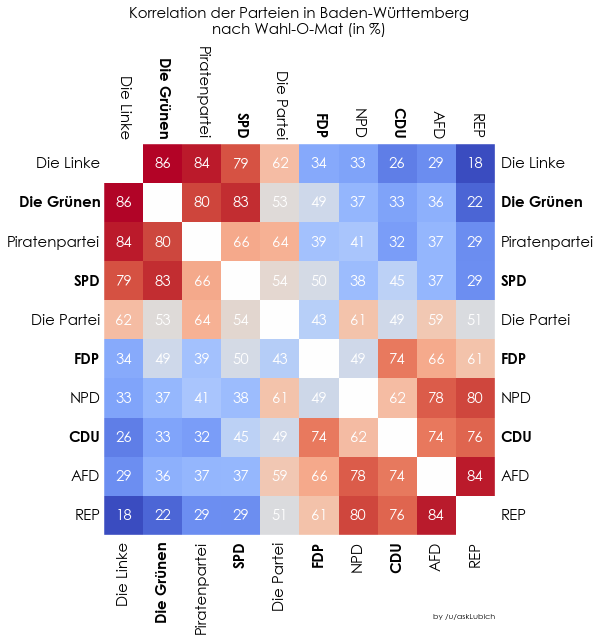

In [79]:
f, ax = plt.subplots(1, figsize=(7, 7), dpi=500, facecolor='white')
ax.imshow(S_sort,interpolation='none',cmap=cmap)#, vmin=0, vmax=1)
ax.axis('off')
partylabel()
labels()
ax.text(NP-0.5,NP+1.5, 'by /u/askLubich', ha='right', va='top',fontsize=8,**font)
ax.set_title(Title1,position=(0.5,1.27),fontsize=fontsize,fontweight='normal',**font)
f.show()
f.savefig('wahlomat.png',bbox_inches='tight', dpi=500)